# <center><font color = green> Oxygen Fugacity and Flow Rates </font color> </center?>

## <b> <center>Alexandra M. Perez (alexandra.perez.chondrules@gmail.com)</center></b>

This code was adapted from the "fO2 buffers and flow rates" excel file created by Mike Huh. Results are displayed in Section 14.

The fO2 buffers code used here originated from Dr. Kayla Iaconvino (http://www.kaylaiacovino.com/Petrology_Tools/Plot_fO2_buffers.py)

# 0. Import Tools

In [133]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from math import *

# 1. Set pressure

In [134]:
P = 1 #Pressure in bar

# 2. Plot the Buffers

This code produces a graph of the redox buffers.

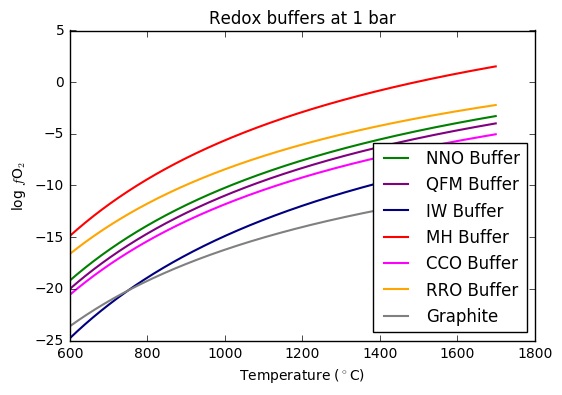

In [135]:
#Define X values (Temp in degrees C)
x = np.arange(600.0, 1700.0, 1)
x_K = x + 273.15 #Temp in K

#Buffer values in terms of logfO2
#Define NNO buffer value at P
NNO_y = (-24930/x_K) + 9.36 + 0.046 * (P-1)/x_K

#Define QFM buffer value at P
QFM_y = (-25096.3/x_K) + 8.735 + 0.11 * (P-1)/x_K

#Define IW buffer value at P
IW_y = (-27489/x_K) + 6.702 + 0.055 * (P-1)/x_K

#Define MH buffer value at P
MH_y = (-25700.6/x_K) + 14.558 + 0.019 * (P-1)/x_K

#Define CoCoO buffer value at P
CCO_y = (-24332.6/x_K) + 7.295 + 0.052 * (P-1)/x_K

#Define ReReO buffer value at P
RRO_y = (-451020 + 297.595 * x_K - 14.6585 * x_K * np.log(x_K))/(8.31441 * x_K * log(10))

#Define graphite-gas (graphite-CO-CO2) buffer value at P
#Equation from French and Eugster (1965) Journal of Geophysical Research
Graphite_y = (-20586/x_K) - 0.044 + np.log10(P) - 0.028 * (P-1)/x_K


#DRAW THE FIGURE
buffers = fig, ax1 = plt.subplots()

#The comma here must be here for the legend to work. I HAVE NO IDEA WHY.
NNO_plt, = ax1.plot(x, NNO_y, color='green', linewidth=1.5, label='NNO Buffer')
QFM_plt, = ax1.plot(x, QFM_y, color='purple',linewidth=1.5, label='QFM Buffer')
IW_plt, = ax1.plot(x, IW_y, color='navy', linewidth=1.5, label='IW Buffer')
MH_plt, = ax1.plot(x, MH_y, color='red', linewidth=1.5, label='MH Buffer')
CCO_plt, = ax1.plot(x, CCO_y, color='magenta', linewidth=1.5, label='CCO Buffer')
RRO_plt, = ax1.plot(x, RRO_y, color='orange', linewidth=1.5, label='RRO Buffer')
Graphite_plt, = ax1.plot(x, Graphite_y, color='gray', linewidth=1.5, label='Graphite')


#Define legend styles
labels = [NNO_plt.get_label(), QFM_plt.get_label(), IW_plt.get_label(), MH_plt.get_label(), 
	CCO_plt.get_label(), RRO_plt.get_label(), Graphite_plt.get_label()]

#Label axes
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('log $f$O$_2$')

ax1.legend(labels, loc='lower right')
plt.title('Redox buffers at ' + str(P) + ' bar')
plt.show()

# 3. User inputs temperature

In [136]:
#x1 = int(input("What is your temperature (C or K): "))
x1 = 1700
x_K1 = x1 + 273.15 #Temp in K
print (x_K1)


1973.15


# 4. User inputs buffer

The code below changes the variable names from above.

In [139]:
NNO = (-24930/x_K1) + 9.36 + 0.046 * (P-1)/x_K1
QFM = (-25096.3/x_K1) + 8.735 + 0.11 * (P-1)/x_K1
IW = (-27489/x_K1) + 6.702 + 0.055 * (P-1)/x_K1
MH = (-25700.6/x_K1) + 14.558 + 0.019 * (P-1)/x_K1
CCO = (-24332.6/x_K1) + 7.295 + 0.052 * (P-1)/x_K1
RRO = (-451020 + 297.595 * x_K1 - 14.6585 * x_K * np.log(x_K1))/(8.31441 * x_K1 * log(10))
Graphite = (-20586/x_K1) - 0.044 + np.log10(P) - 0.028 * (P-1)/x_K1

In [142]:
#buffer = input ("What buffer are you interested in? Type: NNO, QFM, IW:")
buffer = [QFM]

# 5. Print log fO2

In [143]:
print ('log fO2:', buffer)
    

log fO2: [-3.9839012492714687]


In [144]:
#logfO2 = [buffers]
logfO2_list = []
for i in buffer:
    logfO2_list.append(i)
logfO2 = np.array(logfO2_list)
print (logfO2)

[-3.98390125]


# 6.  Calculating EMF

E.M.F. = -(0.0496) * (T in Kelvins) * (fO2)

In [146]:
EMF = []
for i in buffer:
    EMF.append(-(0.0496) * (x_K1) * (i))
#print (EMF)

# 7. Robie et al. Ideal Gas

In [147]:
IG = np.power(10, (logfO2 + (29378 / (x_K1)) - 8.9557)/ 2)
#print (IG)

# 8. Total moles 4.4 cc/sec flow

In [148]:
tm = 4.4/ (82.06*298.16)

# 9. nCO

In [98]:
nCO = tm / (IG + 1)

# 10. nCO2

In [99]:
nCO2 = tm - nCO

# 11. fCO

In [100]:
fCO = nCO * 82.06 * 298.16

# 12. fCO2

In [101]:
fCO2 = nCO2 * 82.06 * 298.16

# 13. Flow Rates

## Glass D

In [102]:
GD = 5.2087 + 45.404 * fCO2 - 7.2333 * np.power(fCO2, 2.) + 0.57211 * np.power(fCO2, 3.)

## Steel D

In [103]:
SD = -2.5676 + 21.025 * fCO2 - 2.0495 * np.power(fCO2, 2.) + 0.10056 * np.power(fCO2, 3.)

## Glass A

In [104]:
GA = -12.952 + 404.85 * fCO - 464.22 * np.power(fCO, 2.) + 258.68 * np.power(fCO, 3.)

## Steel A

In [105]:
SA = -13.223 + 128.52 * fCO - 47.286 * np.power(fCO, 2.) + 8.9552 * np.power(fCO, 3.)

## Glass A

In [106]:
GA2 = 5.2087 + 45.404 * fCO - 7.2333 * np.power(fCO, 2.) + 0.57211 * np.power(fCO, 3.)

## Steel A

In [107]:
SA2 = -2.5676 + 21.025 * fCO - 2.0495 * np.power(fCO, 2.) + 0.10056 * np.power(fCO, 3.)

## Glass D

In [108]:
GD2 = -12.952 + 404.85 * fCO2 - 464.22 * np.power(fCO2, 2.) + 258.68 * np.power(fCO2, 3.)

## Steel D

In [109]:
SD2 = -13.223 + 128.52 * fCO2 - 47.286 * np.power(fCO2, 2.) + 8.9552 * np.power(fCO2, 3.)

# 14. Results

In [110]:
print (P, 'bar Pressure')
print (x1, 'Temperature in celsius')
print (logfO2, 'logfO2')
print (EMF, 'mV EMF')
print (IG, 'Robie et al. Ideal Gas')
print (tm, ' total moles 4.4 cc/sec flow')
print (nCO, 'nCO')
print (nCO2, 'nCO2')
print (fCO, 'fCO')
print (fCO2, 'fCO2')
print ('\n Flow Rates:')
print (GD, 'Glass D')
print (SD, 'Steel D')
print (GA, 'Glass A')
print (SA, 'Steel A')
print (GA2, 'Glass A')
print (SA2, 'Steel A')
print (GD2, 'Steel D')
print (SD2, 'Steel D')

1 bar Pressure
1700 Temperature in celsius
[-3.98390125] logfO2
[389.8974035999999] mV EMF
[ 9.43280821] Robie et al. Ideal Gas
0.0001798339916456321  total moles 4.4 cc/sec flow
[  1.72373524e-05] nCO
[ 0.0001626] nCO2
[ 0.42174647] fCO
[ 3.97825353] fCO2

 Flow Rates:
[ 107.38058745] Glass D
[ 54.97020843] Steel D
[ 94.62636674] Glass A
[ 33.24087519] Steel A
[ 23.11400636] Glass A
[ 5.94261835] Steel A
[ 10537.63284276] Steel D
[ 313.52602732] Steel D


# 15. References

Eggler & Baker (1982) 				
Holmes et al. (1986) Geochim. Cosmochim. Acta 50, 2439-2452				
O'Neill (1986) Am. Min. 71 1007-1010				
O'Neill (1987) Am. Min. 72, 67-75				
O'Neill (1988) Am. Min. 73, 470-486				
O'Neill & Pownceby (1993a) Contrib. Min. Pet. 114, 296-314				
O'Neill & Pownceby (1993b) Contrib. Min. Pet. 114, 315-320				
Pownceby & O'Neill (1993) Contrib. Min. Pet. (in press)				
Robie et al. (1979) USGS Bulletin 1452, 456p.				
Schwab & Kaster (1981)				
Taylor & Foley (1989) J. Geophys. Res. 94, 4146-4158				
Ulmer, P. & Luth (1991) Contrib. Min. Pet. 106, 265-272				
Ulmer, G. & Barnes (1987) Hydrothermal Exp.Tech., 523.p				
